In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("SoftDrink.csv")

In [3]:
df.head()

,YearMonth,SoftDrinkProduction
0,1980-01,1954
1,1980-02,2302
2,1980-03,3054
3,1980-04,2414
4,1980-05,2226


In [4]:
df.dtypes

YearMonth              object
SoftDrinkProduction     int64
dtype: object

In [5]:
df.isnull().sum()

YearMonth              0
SoftDrinkProduction    0
dtype: int64

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
df = pd.read_csv('SoftDrink.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [8]:
df.head()

,SoftDrinkProduction
YearMonth,
1980-01-01,1954
1980-02-01,2302
1980-03-01,3054
1980-04-01,2414
1980-05-01,2226


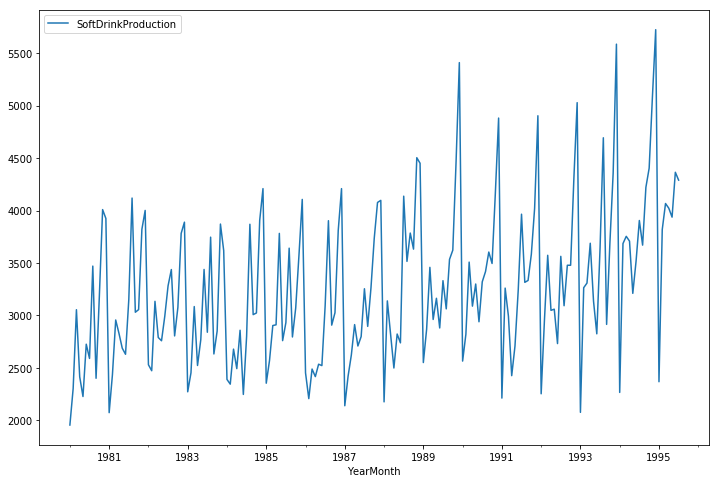

In [9]:
from pylab import rcParams
rcParams ['figure.figsize'] = 12,8
df.plot()
plt.show()

In [10]:
round(df.describe(),3)

,SoftDrinkProduction
count,187.000
mean,3262.610
std,728.357
min,1954.000
25%,2748.000
50%,3134.000
75%,3741.000
max,5725.000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000243EEBA6CC0>]],
      dtype=object)

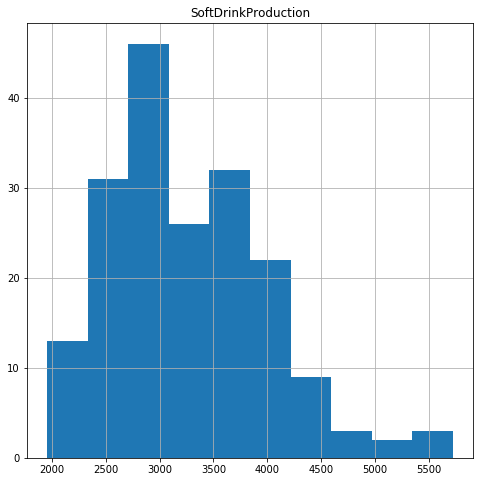

In [11]:
df.hist(figsize=(8,8))

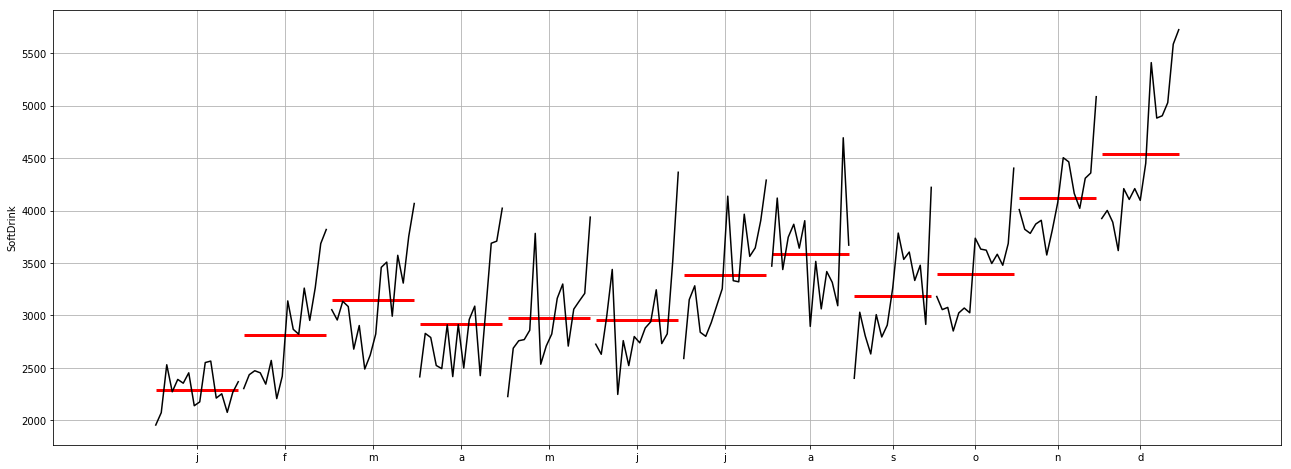

In [12]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df,ylabel='SoftDrink',ax=ax)
plt.grid();

## Decomposition of data

### Additive Model

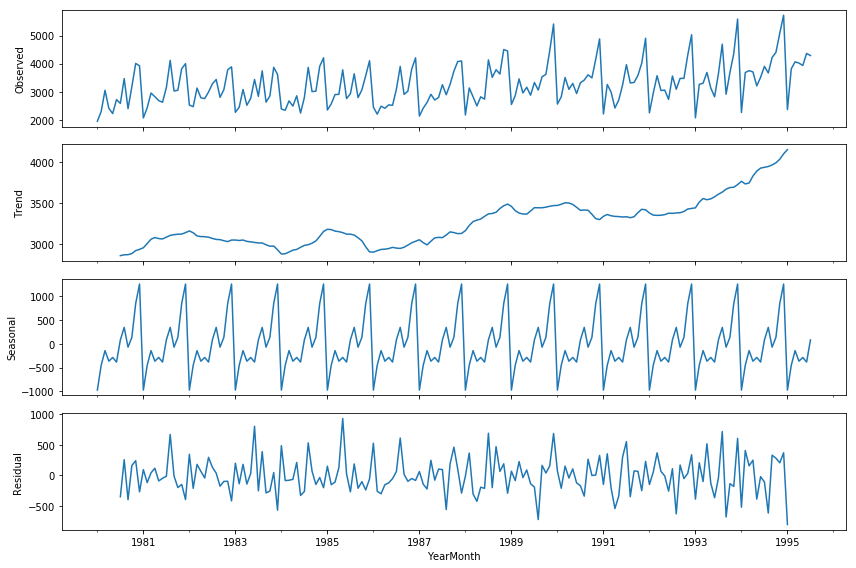

In [13]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

### Multiplicative Model

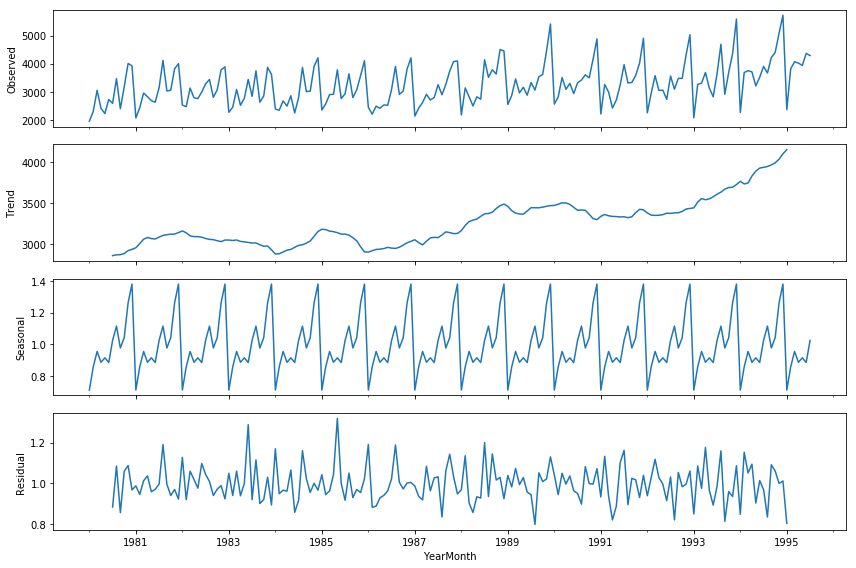

In [14]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

#### Split the data into train and test and plot the training and test data. 

In [15]:
train    =   df[0:int(len(df)*0.71)] 
test     =   df[int(len(df)*0.71):]

In [16]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [17]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,SoftDrinkProduction
YearMonth,
1980-01-01,1954
1980-02-01,2302
1980-03-01,3054
1980-04-01,2414
1980-05-01,2226


Last few rows of Training Data


,SoftDrinkProduction
YearMonth,
1990-08-01,3418
1990-09-01,3604
1990-10-01,3495
1990-11-01,4163
1990-12-01,4882


First few rows of Test Data


,SoftDrinkProduction
YearMonth,
1991-01-01,2211
1991-02-01,3260
1991-03-01,2992
1991-04-01,2425
1991-05-01,2707


Last few rows of Test Data


,SoftDrinkProduction
YearMonth,
1995-03-01,4067
1995-04-01,4022
1995-05-01,3937
1995-06-01,4365
1995-07-01,4290


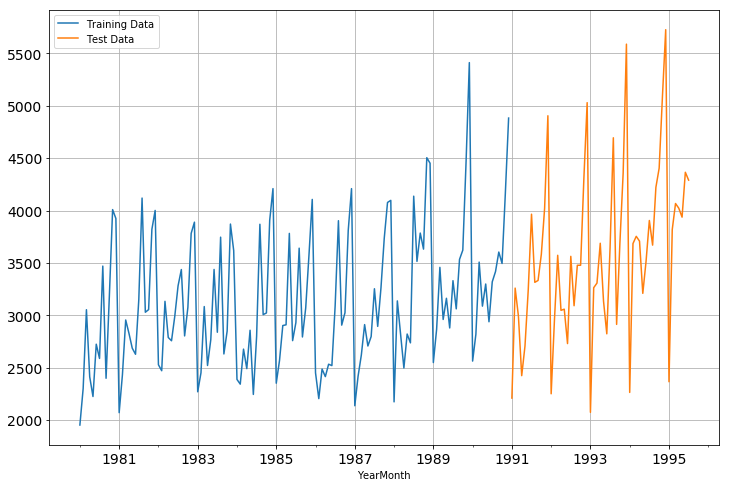

In [18]:
train['SoftDrinkProduction'].plot(fontsize=14)
test['SoftDrinkProduction'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## Building different models and comparing the accuracy metrics.

### Model 1: Linear Regression

In [19]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+256 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310]


In [20]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [21]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,SoftDrinkProduction,time
YearMonth,,
1980-01-01,1954,1
1980-02-01,2302,2
1980-03-01,3054,3
1980-04-01,2414,4
1980-05-01,2226,5


Last few rows of Training Data


,SoftDrinkProduction,time
YearMonth,,
1990-08-01,3418,128
1990-09-01,3604,129
1990-10-01,3495,130
1990-11-01,4163,131
1990-12-01,4882,132


First few rows of Test Data


,SoftDrinkProduction,time
YearMonth,,
1991-01-01,2211,256
1991-02-01,3260,257
1991-03-01,2992,258
1991-04-01,2425,259
1991-05-01,2707,260


Last few rows of Test Data


,SoftDrinkProduction,time
YearMonth,,
1995-03-01,4067,306
1995-04-01,4022,307
1995-05-01,3937,308
1995-06-01,4365,309
1995-07-01,4290,310


In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['SoftDrinkProduction'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

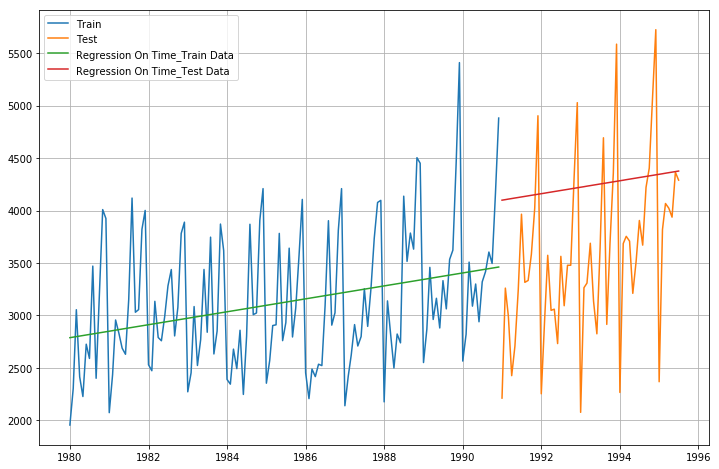

In [23]:
train_predictions_model1= lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Train Data')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [24]:
from sklearn import metrics

In [25]:
rmse_model1_test = metrics.mean_squared_error(test['SoftDrinkProduction'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1015063.096 


In [26]:
rmse_model1_train = metrics.mean_squared_error(train['SoftDrinkProduction'],train_predictions_model1)
print("For RegressionOnTime forecast on the Train Data,  RMSE is %3.3f " %(rmse_model1_train))

For RegressionOnTime forecast on the Train Data,  RMSE is 372512.417 


In [27]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1.015063e+06


In [28]:
resultsDf = pd.DataFrame({'Train RMSE': [rmse_model1_train]},index=['RegressionOnTime'])
resultsDf

,Train RMSE
RegressionOnTime,372512.417379


### Model 2: Naive Approach: y^t+1=yt

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [29]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [30]:
train.tail()

,SoftDrinkProduction
YearMonth,
1990-08-01,3418
1990-09-01,3604
1990-10-01,3495
1990-11-01,4163
1990-12-01,4882


In [31]:
NaiveModel_test['naive'] = np.asarray(train['SoftDrinkProduction'])[len(np.asarray(train['SoftDrinkProduction']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    4882
1991-02-01    4882
1991-03-01    4882
1991-04-01    4882
1991-05-01    4882
Name: naive, dtype: int64

In [32]:
NaiveModel_train['naive'] = np.asarray(test['SoftDrinkProduction'])[len(np.asarray(test['SoftDrinkProduction']))-1]
NaiveModel_train['naive'].head()

YearMonth
1980-01-01    4290
1980-02-01    4290
1980-03-01    4290
1980-04-01    4290
1980-05-01    4290
Name: naive, dtype: int64

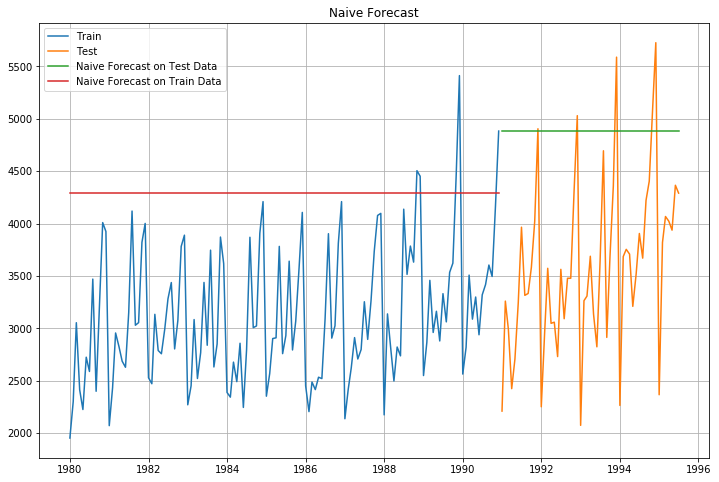

In [33]:
plt.plot(NaiveModel_train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Train Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [34]:
rmse_model2_test = metrics.mean_squared_error(test['SoftDrinkProduction'],NaiveModel_test['naive'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 2308148.618


In [35]:
rmse_model2_train = metrics.mean_squared_error(train['SoftDrinkProduction'],NaiveModel_train['naive'])
print("For RegressionOnTime forecast on the Train Data,  RMSE is %3.3f" %(rmse_model2_train))

For RegressionOnTime forecast on the Train Data,  RMSE is 1770092.091


In [36]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,Test RMSE,Train RMSE
RegressionOnTime,NaN,372512.417379
NaiveModel,2.308149e+06,NaN


### Model 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values

In [37]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [38]:
SimpleAverage_test['mean_forecast'] = train['SoftDrinkProduction'].mean()
SimpleAverage_test.head()

,SoftDrinkProduction,mean_forecast
YearMonth,,
1991-01-01,2211,3124.166667
1991-02-01,3260,3124.166667
1991-03-01,2992,3124.166667
1991-04-01,2425,3124.166667
1991-05-01,2707,3124.166667


In [39]:
SimpleAverage_train.head()

,SoftDrinkProduction
YearMonth,
1980-01-01,1954
1980-02-01,2302
1980-03-01,3054
1980-04-01,2414
1980-05-01,2226


In [40]:
SimpleAverage_test['mean_forecast'] = train['SoftDrinkProduction'].mean()
SimpleAverage_test.head()

,SoftDrinkProduction,mean_forecast
YearMonth,,
1991-01-01,2211,3124.166667
1991-02-01,3260,3124.166667
1991-03-01,2992,3124.166667
1991-04-01,2425,3124.166667
1991-05-01,2707,3124.166667


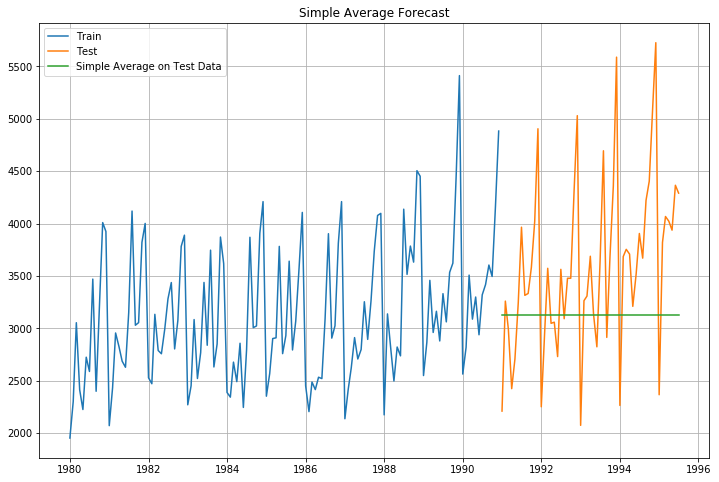

In [41]:
plt.plot(SimpleAverage_train['SoftDrinkProduction'], label='Train')
plt.plot(SimpleAverage_test['SoftDrinkProduction'], label='Test')


plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')


plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [42]:
rmse_model3_test = metrics.mean_squared_error(test['SoftDrinkProduction'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 873016.197


In [43]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,Test RMSE,Train RMSE
RegressionOnTime,NaN,372512.417379
NaiveModel,2.308149e+06,NaN
SimpleAverageModel,8.730162e+05,NaN


## Method 4: Moving Average(MA)

####  For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

#### For Moving Average, we are going to average over the entire data.

In [44]:
MovingAverage = df.copy()
MovingAverage.head()

,SoftDrinkProduction
YearMonth,
1980-01-01,1954
1980-02-01,2302
1980-03-01,3054
1980-04-01,2414
1980-05-01,2226


In [45]:
MovingAverage['Trailing_2'] = MovingAverage['SoftDrinkProduction'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['SoftDrinkProduction'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['SoftDrinkProduction'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['SoftDrinkProduction'].rolling(9).mean()

MovingAverage.head()

,SoftDrinkProduction,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1954,NaN,NaN,NaN,NaN
1980-02-01,2302,2128.0,NaN,NaN,NaN
1980-03-01,3054,2678.0,NaN,NaN,NaN
1980-04-01,2414,2734.0,2431.0,NaN,NaN
1980-05-01,2226,2320.0,2499.0,NaN,NaN


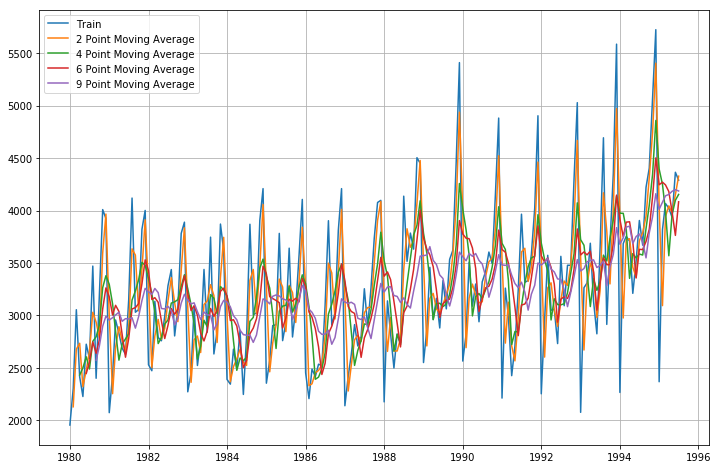

In [46]:
plt.plot(MovingAverage['SoftDrinkProduction'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

##### Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [47]:
# Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.71)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.71):]

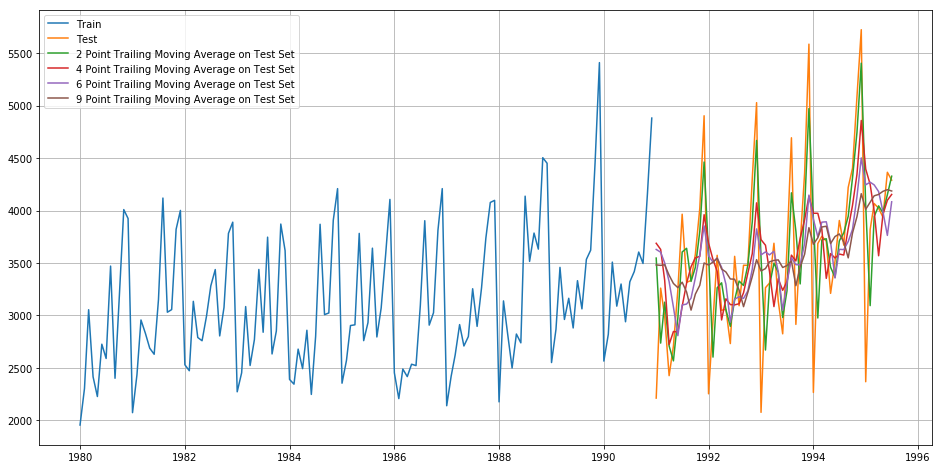

In [48]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['SoftDrinkProduction'], label='Train')
plt.plot(trailing_MovingAverage_test['SoftDrinkProduction'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [49]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 309943.191
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 472218.725
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 504829.969
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 541533.838


In [50]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Test RMSE,Train RMSE
RegressionOnTime,NaN,372512.417379
NaiveModel,2.308149e+06,NaN
SimpleAverageModel,8.730162e+05,NaN
2pointTrailingMovingAverage,3.099432e+05,NaN
4pointTrailingMovingAverage,4.722187e+05,NaN
6pointTrailingMovingAverage,5.048300e+05,NaN
9pointTrailingMovingAverage,5.415338e+05,NaN


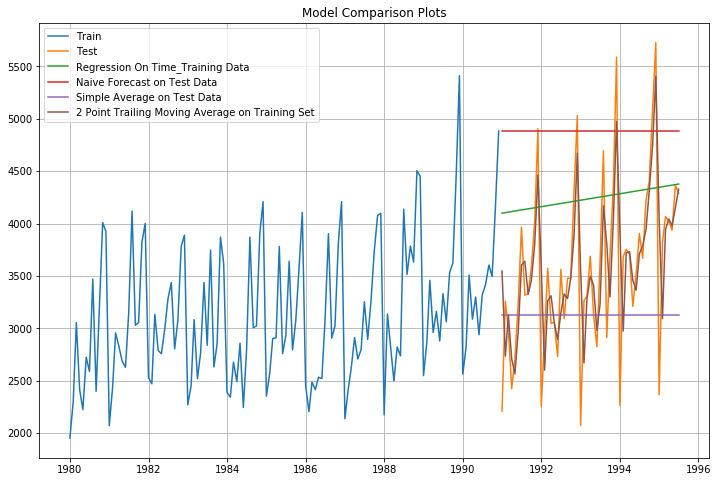

In [51]:
## Plotting on both Training and Test data

plt.plot(train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [52]:
import matplotlib
import sklearn
import statsmodels

In [53]:
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Seaborn version:',sns.__version__)
print('Matplotlib version:',matplotlib.__version__)
print('Sklearn version:',sklearn.__version__)
print('Statsmodels version:',statsmodels.__version__)

Numpy version: 1.15.4
Pandas version: 0.23.4
Seaborn version: 0.9.0
Matplotlib version: 3.0.2
Sklearn version: 0.21.3
Statsmodels version: 0.9.0


In [54]:
Time_Stamp = pd.date_range(start='1980-01-01',periods=len(df),freq='M')
Time_Stamp

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [55]:
df['Time_Stamp'] = Time_Stamp
df.head()

,SoftDrinkProduction,Time_Stamp
YearMonth,,
1980-01-01,1954,1980-01-31
1980-02-01,2302,1980-02-29
1980-03-01,3054,1980-03-31
1980-04-01,2414,1980-04-30
1980-05-01,2226,1980-05-31


In [56]:
df.set_index(keys='Time_Stamp',inplace=True)
df

,SoftDrinkProduction
Time_Stamp,
1980-01-31,1954
1980-02-29,2302
1980-03-31,3054
1980-04-30,2414
1980-05-31,2226
1980-06-30,2725
1980-07-31,2589
1980-08-31,3470
1980-09-30,2400


#### Plot the Time Series to understand the behaviour of the data.

In [57]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

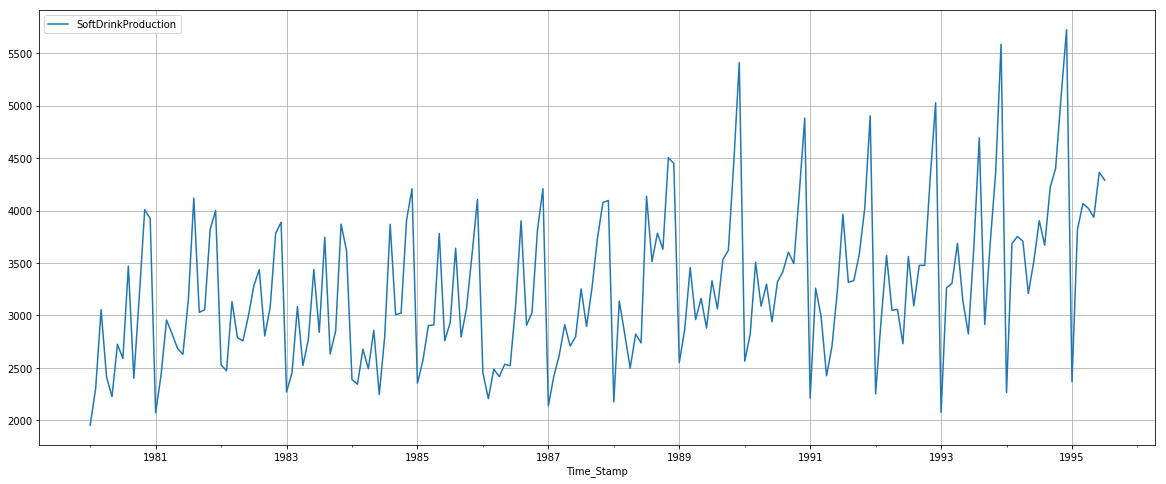

In [58]:
df.plot(grid=True);

##### We can see that there is a trend with a seasonal pattern associated as well.

In [59]:
df.describe()

,SoftDrinkProduction
count,187.000000
mean,3262.609626
std,728.357367
min,1954.000000
25%,2748.000000
50%,3134.000000
75%,3741.000000
max,5725.000000


#### The basic measures of descriptive statistics tell us how the Sales have varied across years. But remember, for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.

### Decompose the Time Series and plot the different components.

In [60]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

### Additive Decomposition

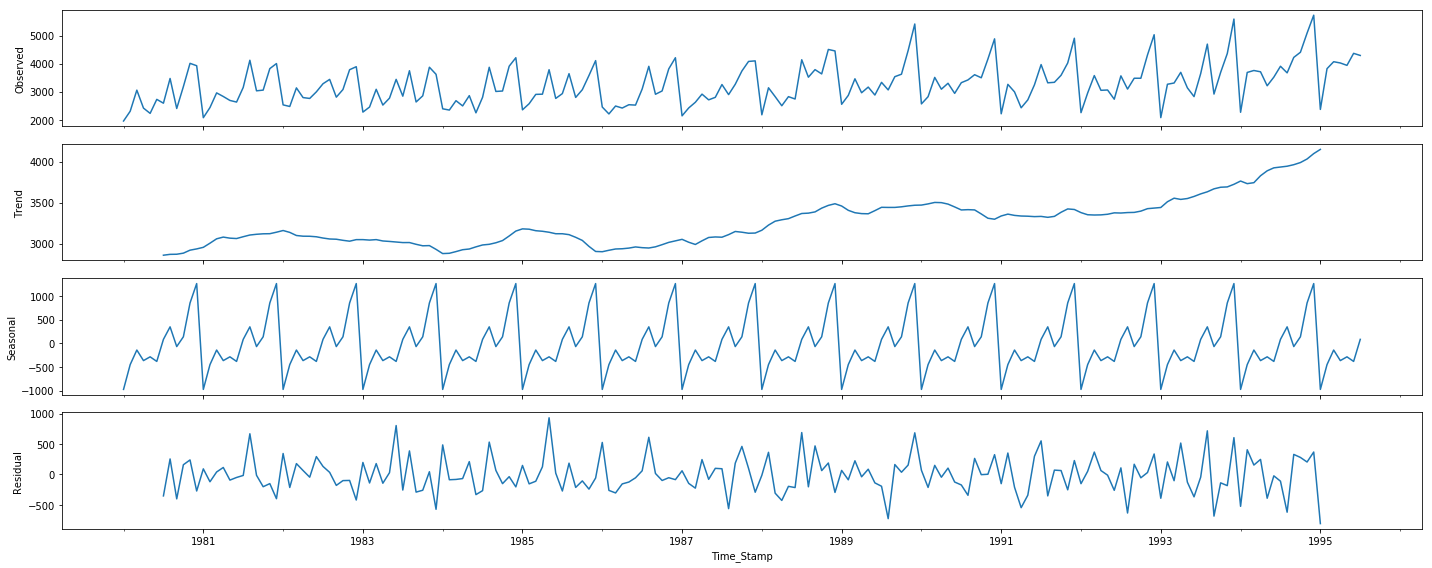

In [61]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

#### We see that the residuals have a pattern in this decomposition.

In [62]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
             SoftDrinkProduction
Time_Stamp                     
1980-01-31                  NaN
1980-02-29                  NaN
1980-03-31                  NaN
1980-04-30                  NaN
1980-05-31                  NaN
1980-06-30                  NaN
1980-07-31          2858.833333
1980-08-31          2869.250000
1980-09-30          2870.666667
1980-10-31          2883.833333
1980-11-30          2920.291667
1980-12-31          2935.500000 

Seasonality 
             SoftDrinkProduction
Time_Stamp                     
1980-01-31          -974.619692
1980-02-29          -451.246677
1980-03-31          -143.118700
1980-04-30          -366.181200
1980-05-31          -286.815129
1980-06-30          -383.594891
1980-07-31            82.191419
1980-08-31           346.363641
1980-09-30           -69.997470
1980-10-31           136.721974
1980-11-30           850.369196
1980-12-31          1259.927530 

Residual 
             SoftDrinkProduction
Time_Stamp                     
198

### Multiplicative Decomposition

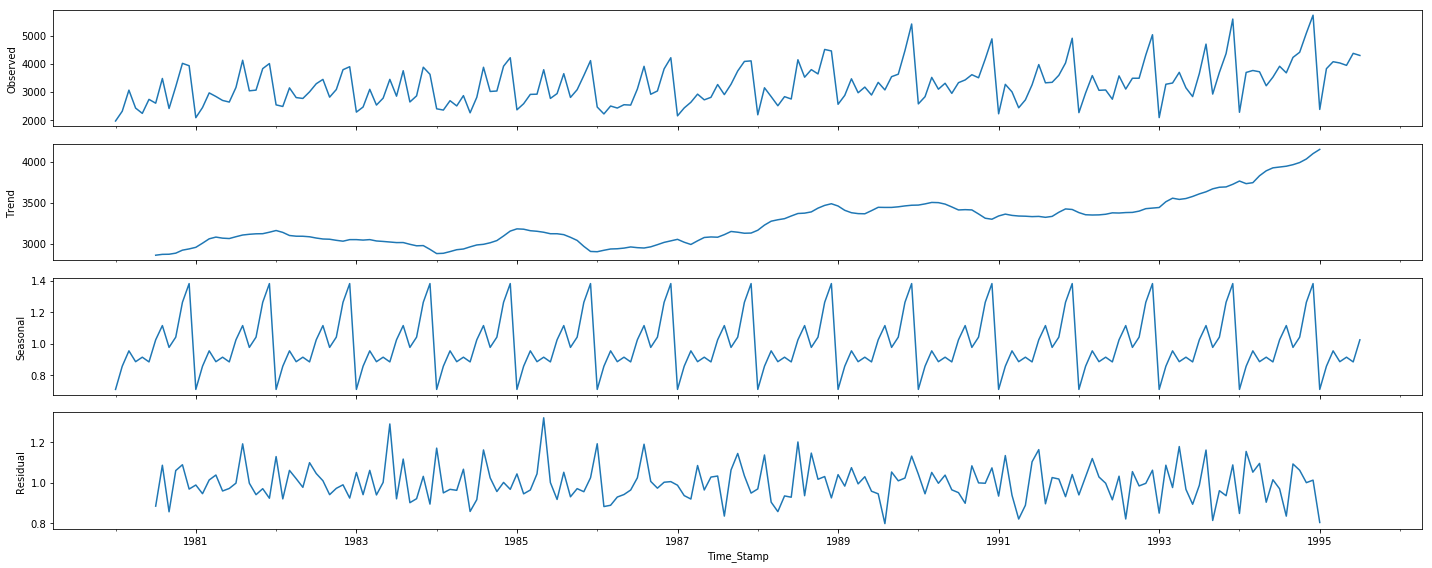

In [63]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [64]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
             SoftDrinkProduction
Time_Stamp                     
1980-01-31                  NaN
1980-02-29                  NaN
1980-03-31                  NaN
1980-04-30                  NaN
1980-05-31                  NaN
1980-06-30                  NaN
1980-07-31          2858.833333
1980-08-31          2869.250000
1980-09-30          2870.666667
1980-10-31          2883.833333
1980-11-30          2920.291667
1980-12-31          2935.500000 

Seasonality 
             SoftDrinkProduction
Time_Stamp                     
1980-01-31             0.709526
1980-02-29             0.856420
1980-03-31             0.953935
1980-04-30             0.885217
1980-05-31             0.913735
1980-06-30             0.883890
1980-07-31             1.023936
1980-08-31             1.114195
1980-09-30             0.975955
1980-10-31             1.040944
1980-11-30             1.261792
1980-12-31             1.380456 

Residual 
             SoftDrinkProduction
Time_Stamp                     
198

### Check for stationarity of the whole Time Series data.

#### Check for stationarity of the whole Time Series data.

#### The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

#### The hypothesis in a simple form for the ADF test is:

#### H0 : The Time Series has a unit root and is thus non-stationary.
#### H1 : The Time Series does not have a unit root and is thus stationary.

#### We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the α value.¶

In [65]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

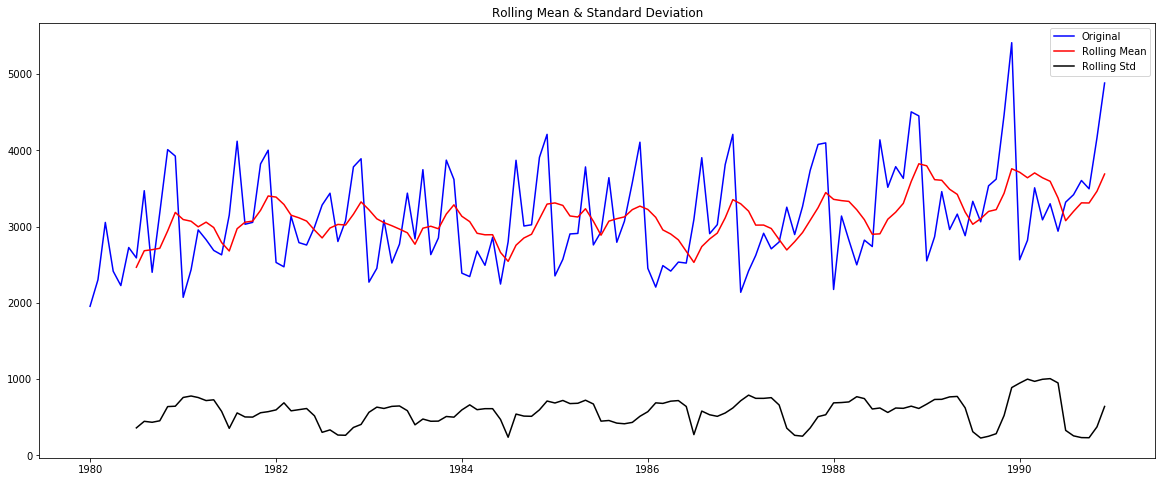

Results of Dickey-Fuller Test:
Test Statistic                  -0.990112
p-value                          0.756854
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [66]:
test_stationarity(train['SoftDrinkProduction'])

#### Seriers is not stationery with original form at alpha = 0.05.The p-value is obtained is greater than significance level of 0.05 and the ADF statistic is higher than any of the critical values. Clearly, there is no reason to reject the null hypothesis. So, the time series is in fact non-stationary.

In [67]:
import itertools
p = q = range(0, 3)
d= range(0,1)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 5)
Model: (0, 0, 1)(0, 0, 2, 5)
Model: (0, 0, 2)(1, 0, 0, 5)
Model: (0, 0, 2)(1, 0, 1, 5)


## Build an ARIMA model

In [68]:
# Creating an empty Dataframe with column names only
dfObj = pd.DataFrame(columns=['param', 'AIC'])
dfObj

,param,AIC


In [69]:
# Let's start by building ARIMA model -- Although the data set has some seasonality and hence ARIMA is 
## not the right option Reason for making the model is to understand how different the model could be if seasonality is not considered

from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
            try:
                mod = ARIMA(train['SoftDrinkProduction'], order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj = dfObj.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\sign

ARIMA(0, 0, 0) - AIC:2084.8535973198195
ARIMA(0, 0, 1) - AIC:2068.1126236309515
ARIMA(0, 0, 2) - AIC:2069.258650907168
ARIMA(1, 0, 0) - AIC:2073.100089001478
ARIMA(1, 0, 1) - AIC:2069.0480149906098


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 2) - AIC:2070.9853556690714
ARIMA(2, 0, 0) - AIC:2072.2891924258033


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 1) - AIC:2070.9655312619097


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 2) - AIC:2071.2541231076902


In [70]:
dfObj.sort_values(by=['AIC'])

,param,AIC
1,"(0, 0, 1)",2068.112624
4,"(1, 0, 1)",2069.048015
2,"(0, 0, 2)",2069.258651
7,"(2, 0, 1)",2070.965531
5,"(1, 0, 2)",2070.985356
8,"(2, 0, 2)",2071.254123
6,"(2, 0, 0)",2072.289192
3,"(1, 0, 0)",2073.100089
0,"(0, 0, 0)",2084.853597


In [71]:
## ARIMA(1,0,2) has the lowest AIC
mod = ARIMA(train['SoftDrinkProduction'], order=(1,0,2))

results_Arima = mod.fit()

print(results_Arima.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                               ARMA Model Results                              
Dep. Variable:     SoftDrinkProduction   No. Observations:                  132
Model:                      ARMA(1, 2)   Log Likelihood               -1030.493
Method:                        css-mle   S.D. of innovations            594.022
Date:                 Sun, 20 Feb 2022   AIC                           2070.985
Time:                         20:37:29   BIC                           2085.399
Sample:                     01-01-1980   HQIC                          2076.843
                          - 12-01-1990                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      3125.4073     69.769     44.797      0.000    2988.663    3262.151
ar.L1.SoftDrinkProduction    -0.3890      0.639     -0.609      0.544      -1.

In [72]:
final_hat_avg =test.copy()
pred_ARIMA = results_Arima.forecast(steps=len(test))
pred_ARIMA[0]

array([3601.15035305, 3056.0812699 , 3152.37601399, 3114.91616357,
       3129.48851024, 3123.81968655, 3126.02492931, 3125.16706251,
       3125.50078334, 3125.3709618 , 3125.42146399, 3125.40181801,
       3125.40946054, 3125.4064875 , 3125.40764405, 3125.40719414,
       3125.40736916, 3125.40730108, 3125.40732756, 3125.40731726,
       3125.40732127, 3125.40731971, 3125.40732031, 3125.40732008,
       3125.40732017, 3125.40732013, 3125.40732015, 3125.40732014,
       3125.40732015, 3125.40732014, 3125.40732014, 3125.40732014,
       3125.40732014, 3125.40732014, 3125.40732014, 3125.40732014,
       3125.40732014, 3125.40732014, 3125.40732014, 3125.40732014,
       3125.40732014, 3125.40732014, 3125.40732014, 3125.40732014,
       3125.40732014, 3125.40732014, 3125.40732014, 3125.40732014,
       3125.40732014, 3125.40732014, 3125.40732014, 3125.40732014,
       3125.40732014, 3125.40732014, 3125.40732014])

In [73]:
from math import sqrt
from sklearn.metrics import  mean_squared_error
rmse = sqrt(mean_squared_error(test.SoftDrinkProduction,pred_ARIMA[0]))
print(rmse)

944.5323651737499


In [74]:
resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(1, 0, 2)'])

resultsDf

,Test RMSE
"ARIMA(1, 0, 2)",944.532365


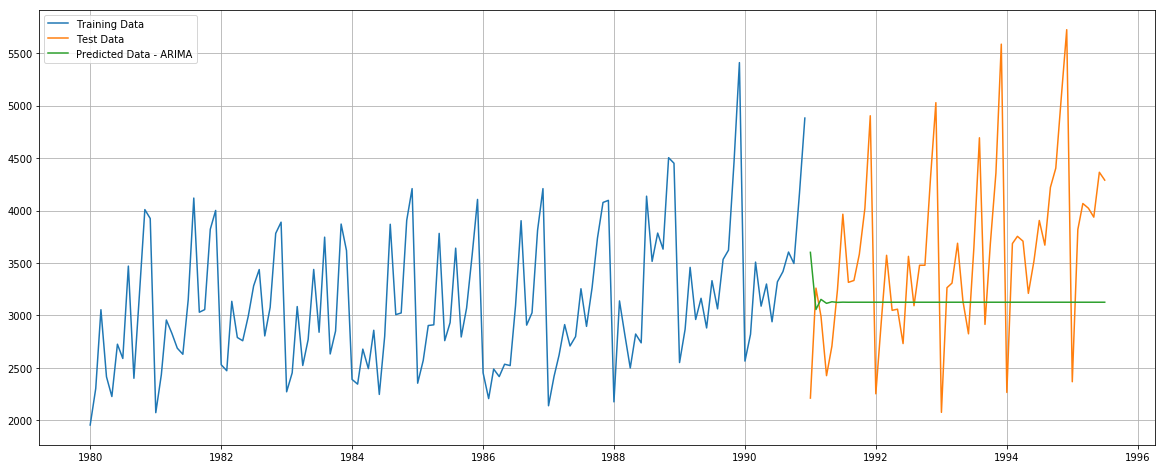

In [75]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

### Build an SARIMA model.

In [76]:
### As the dataset has seasonality.. Let's build the model with SARIMA
dfObj2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj2

,param,seasonal,AIC


In [77]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train ['SoftDrinkProduction'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj2 = dfObj2.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, Va

SARIMA(0, 0, 0)x(0, 0, 0, 5)7 - AIC:2488.0826149090144
SARIMA(0, 0, 0)x(0, 0, 1, 5)7 - AIC:2270.0272244277553
SARIMA(0, 0, 0)x(0, 0, 2, 5)7 - AIC:2139.1761134366325
SARIMA(0, 0, 0)x(1, 0, 0, 5)7 - AIC:2098.864524230627
SARIMA(0, 0, 0)x(1, 0, 1, 5)7 - AIC:2020.175067407827


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 0)x(1, 0, 2, 5)7 - AIC:1942.8153468875396
SARIMA(0, 0, 0)x(2, 0, 0, 5)7 - AIC:1990.7642326480811


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 0)x(2, 0, 1, 5)7 - AIC:1938.2560182809395
SARIMA(0, 0, 0)x(2, 0, 2, 5)7 - AIC:1932.6312646915148
SARIMA(0, 0, 1)x(0, 0, 0, 5)7 - AIC:2329.6786948409317


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(0, 0, 1, 5)7 - AIC:2171.1667653127956


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(0, 0, 2, 5)7 - AIC:2060.0369043337355
SARIMA(0, 0, 1)x(1, 0, 0, 5)7 - AIC:2071.8754492966823


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(1, 0, 1, 5)7 - AIC:1982.98904252122


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(1, 0, 2, 5)7 - AIC:1896.1804558732447
SARIMA(0, 0, 1)x(2, 0, 0, 5)7 - AIC:1969.8796715765443


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(2, 0, 1, 5)7 - AIC:1929.1716907433902


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(2, 0, 2, 5)7 - AIC:1911.3993441653924
SARIMA(0, 0, 2)x(0, 0, 0, 5)7 - AIC:2235.867576854069
SARIMA(0, 0, 2)x(0, 0, 1, 5)7 - AIC:2087.463780461431


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(0, 0, 2, 5)7 - AIC:1997.2303456511918


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(1, 0, 0, 5)7 - AIC:2156.3236802075276


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(1, 0, 1, 5)7 - AIC:1966.3434729060048


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(1, 0, 2, 5)7 - AIC:2002.5417904473225
SARIMA(0, 0, 2)x(2, 0, 0, 5)7 - AIC:1964.6202343005211


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(2, 0, 1, 5)7 - AIC:1997.0054268921551


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(2, 0, 2, 5)7 - AIC:1886.702548944488
SARIMA(1, 0, 0)x(0, 0, 0, 5)7 - AIC:2104.815190341973
SARIMA(1, 0, 0)x(0, 0, 1, 5)7 - AIC:2028.6088020524087
SARIMA(1, 0, 0)x(0, 0, 2, 5)7 - AIC:1935.1041336024791
SARIMA(1, 0, 0)x(1, 0, 0, 5)7 - AIC:2028.6937221372768
SARIMA(1, 0, 0)x(1, 0, 1, 5)7 - AIC:2005.4353885987855


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 0)x(1, 0, 2, 5)7 - AIC:1923.9667773746369
SARIMA(1, 0, 0)x(2, 0, 0, 5)7 - AIC:1935.6647065769262


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 0)x(2, 0, 1, 5)7 - AIC:1933.5553785828472


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 0)x(2, 0, 2, 5)7 - AIC:1924.3323662220564
SARIMA(1, 0, 1)x(0, 0, 0, 5)7 - AIC:2051.583466768591


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(0, 0, 1, 5)7 - AIC:1971.7231581465978


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(0, 0, 2, 5)7 - AIC:1891.5604042581685
SARIMA(1, 0, 1)x(1, 0, 0, 5)7 - AIC:1989.1193407090914


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(1, 0, 1, 5)7 - AIC:1987.7724498579128


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(1, 0, 2, 5)7 - AIC:1887.6333434976978


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(2, 0, 0, 5)7 - AIC:1906.7705578738598


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(2, 0, 1, 5)7 - AIC:1903.1768454863409


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(2, 0, 2, 5)7 - AIC:1903.7811683509044
SARIMA(1, 0, 2)x(0, 0, 0, 5)7 - AIC:2023.8068975153315


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(0, 0, 1, 5)7 - AIC:1949.1313148652446


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(0, 0, 2, 5)7 - AIC:1866.216045745993
SARIMA(1, 0, 2)x(1, 0, 0, 5)7 - AIC:1979.988807383589


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(1, 0, 1, 5)7 - AIC:1947.9369087721861


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(1, 0, 2, 5)7 - AIC:1866.640400317721
SARIMA(1, 0, 2)x(2, 0, 0, 5)7 - AIC:1899.858927539373


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(2, 0, 1, 5)7 - AIC:1903.5392388784187
SARIMA(1, 0, 2)x(2, 0, 2, 5)7 - AIC:1878.8222004244067
SARIMA(2, 0, 0)x(0, 0, 0, 5)7 - AIC:2083.9647847351334
SARIMA(2, 0, 0)x(0, 0, 1, 5)7 - AIC:2023.547163225992


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(0, 0, 2, 5)7 - AIC:1923.4243162795785
SARIMA(2, 0, 0)x(1, 0, 0, 5)7 - AIC:2008.5865962161577


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(1, 0, 1, 5)7 - AIC:1987.6908868909231
SARIMA(2, 0, 0)x(1, 0, 2, 5)7 - AIC:1920.6378563381247
SARIMA(2, 0, 0)x(2, 0, 0, 5)7 - AIC:1930.2152382511056


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(2, 0, 1, 5)7 - AIC:1908.1283793155299
SARIMA(2, 0, 0)x(2, 0, 2, 5)7 - AIC:1904.7580758226306
SARIMA(2, 0, 1)x(0, 0, 0, 5)7 - AIC:2042.2411170806054


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(0, 0, 1, 5)7 - AIC:1967.2859647449463


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(0, 0, 2, 5)7 - AIC:1883.904626728407


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(1, 0, 0, 5)7 - AIC:1967.837423830719


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(1, 0, 1, 5)7 - AIC:1969.5827907994317


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(1, 0, 2, 5)7 - AIC:1888.6293400478885
SARIMA(2, 0, 1)x(2, 0, 0, 5)7 - AIC:1884.2983133397693


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(2, 0, 1, 5)7 - AIC:1889.1540131171926


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(2, 0, 2, 5)7 - AIC:1884.1601072829503
SARIMA(2, 0, 2)x(0, 0, 0, 5)7 - AIC:2024.1512196142842
SARIMA(2, 0, 2)x(0, 0, 1, 5)7 - AIC:1948.874586473997


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(0, 0, 2, 5)7 - AIC:1867.5675213696984
SARIMA(2, 0, 2)x(1, 0, 0, 5)7 - AIC:1963.7386826413415


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(1, 0, 1, 5)7 - AIC:1946.811526075483


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(1, 0, 2, 5)7 - AIC:1867.4701086344853
SARIMA(2, 0, 2)x(2, 0, 0, 5)7 - AIC:1926.040143721873


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(2, 0, 1, 5)7 - AIC:1883.4173148922987
SARIMA(2, 0, 2)x(2, 0, 2, 5)7 - AIC:1879.639456015708


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [78]:
dfObj2.sort_values(by=['AIC'])

,param,seasonal,AIC
47,"(1, 0, 2)","(0, 0, 2, 5)",1866.216046
50,"(1, 0, 2)","(1, 0, 2, 5)",1866.640400
77,"(2, 0, 2)","(1, 0, 2, 5)",1867.470109
74,"(2, 0, 2)","(0, 0, 2, 5)",1867.567521
53,"(1, 0, 2)","(2, 0, 2, 5)",1878.822200
80,"(2, 0, 2)","(2, 0, 2, 5)",1879.639456
79,"(2, 0, 2)","(2, 0, 1, 5)",1883.417315
65,"(2, 0, 1)","(0, 0, 2, 5)",1883.904627
71,"(2, 0, 1)","(2, 0, 2, 5)",1884.160107
69,"(2, 0, 1)","(2, 0, 0, 5)",1884.298313


In [79]:
## SARIMA(1,0,2)(0,0,2,5) - AIC:6914.849775
mod = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'],
                                order=(1,0,2),
                                seasonal_order=(0,0,2,5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                
Dep. Variable:               SoftDrinkProduction   No. Observations:                  132
Model:             SARIMAX(1, 0, 2)x(0, 0, 2, 5)   Log Likelihood                -927.108
Date:                           Sun, 20 Feb 2022   AIC                           1866.216
Time:                                   20:38:02   BIC                           1882.891
Sample:                               01-01-1980   HQIC                          1872.987
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0017      0.001    833.817      0.000       0.999       1.004
ma.L1         -0.6529      0.130     -5.008

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


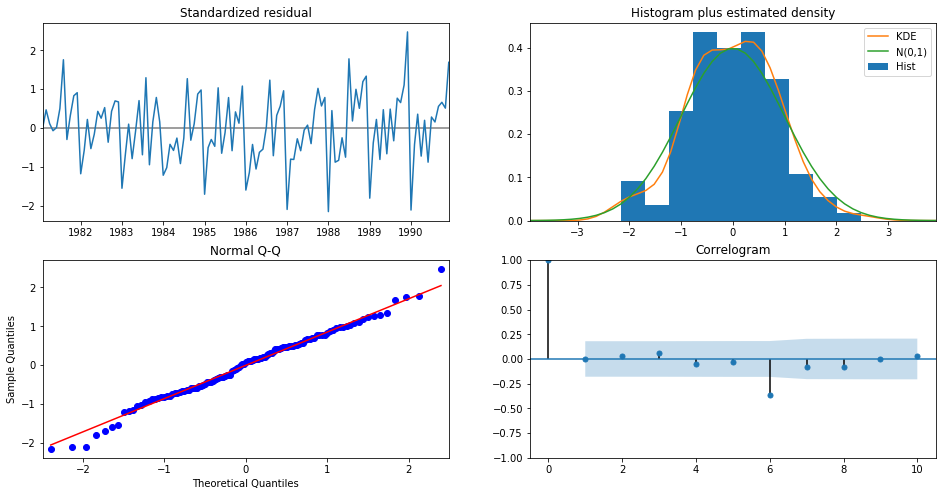

In [80]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [81]:
final_hat_avg =test.copy()
pred_SARIMA = results.get_forecast(steps=len(test))
pred_SARIMA.predicted_mean

1991-01-01    3829.774296
1991-02-01    3626.691345
1991-03-01    3530.545027
1991-04-01    3674.879956
1991-05-01    3521.191223
1991-06-01    3507.682931
1991-07-01    3459.119754
1991-08-01    3421.261744
1991-09-01    3443.352406
1991-10-01    3248.420473
1991-11-01    3473.583666
1991-12-01    3570.960992
1992-01-01    3576.907190
1992-02-01    3582.863289
1992-03-01    3588.829306
1992-04-01    3594.805258
1992-05-01    3600.791160
1992-06-01    3606.787030
1992-07-01    3612.792884
1992-08-01    3618.808738
1992-09-01    3624.834610
1992-10-01    3630.870516
1992-11-01    3636.916473
1992-12-01    3642.972497
1993-01-01    3649.038605
1993-02-01    3655.114814
1993-03-01    3661.201141
1993-04-01    3667.297603
1993-05-01    3673.404216
1993-06-01    3679.520998
1993-07-01    3685.647965
1993-08-01    3691.785135
1993-09-01    3697.932523
1993-10-01    3704.090149
1993-11-01    3710.258027
1993-12-01    3716.436176
1994-01-01    3722.624613
1994-02-01    3728.823354
1994-03-01  

In [82]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test.SoftDrinkProduction,pred_SARIMA.predicted_mean))
print(rmse)

792.246593472974


In [83]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['SARIMA(1, 0, 2)(0, 0, 2)5'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"ARIMA(1, 0, 2)",944.532365
"SARIMA(1, 0, 2)(0, 0, 2)5",792.246593


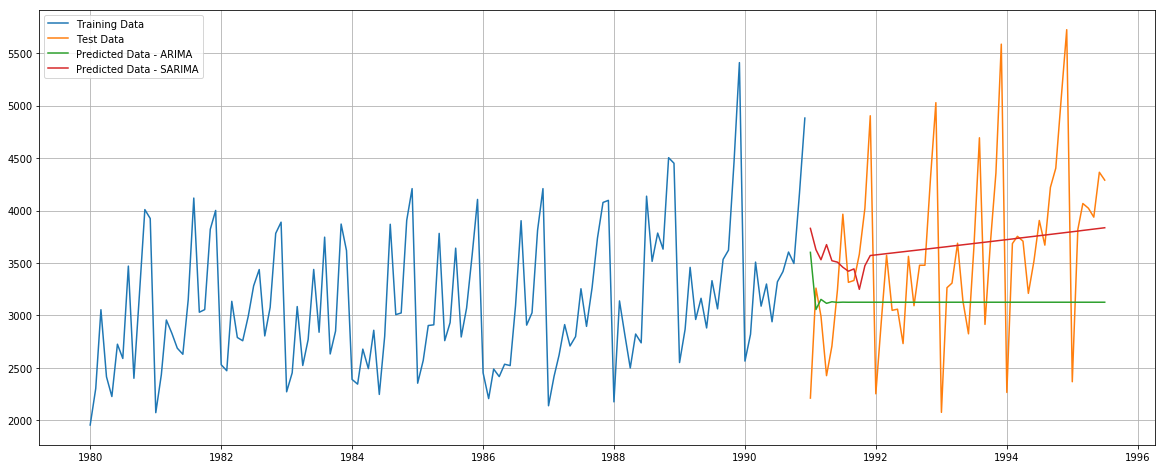

In [84]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

#### RMSE OF SARIMA has reduced in comparison to ARIMA when seasonality was introduced

### ACF & PACF

In [85]:
# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

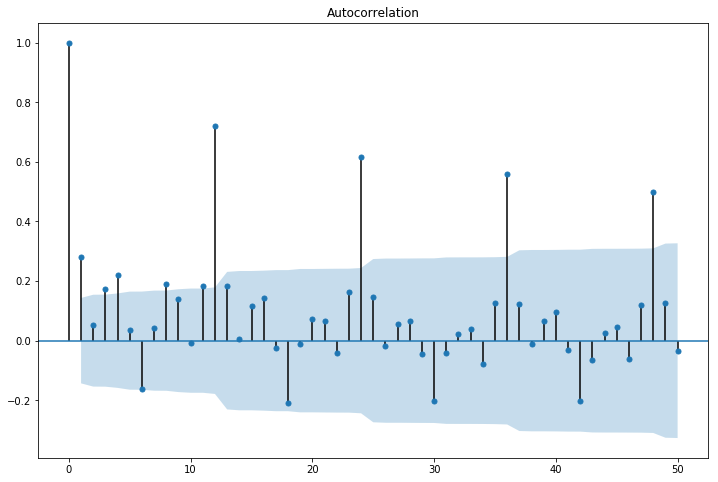

In [86]:
plt.figure(figsize=(12,8))
plot_acf(df,lags=50,  ax=plt.gca())
plt.show()

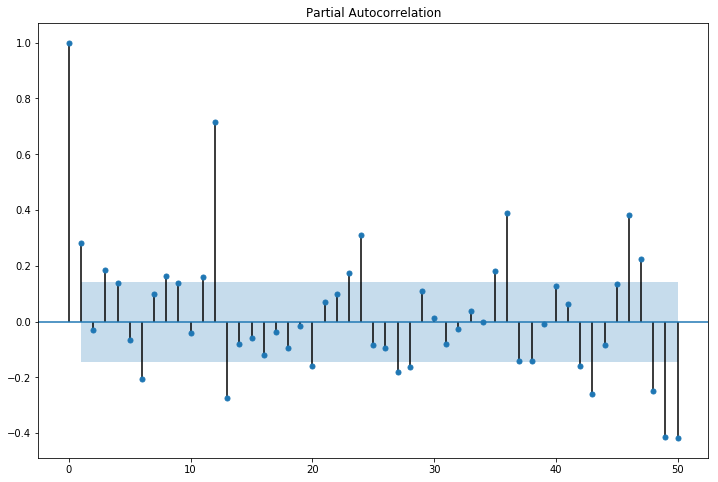

In [87]:
plt.figure(figsize=(12,8))
plot_pacf(df, lags=50, ax=plt.gca())
plt.show()

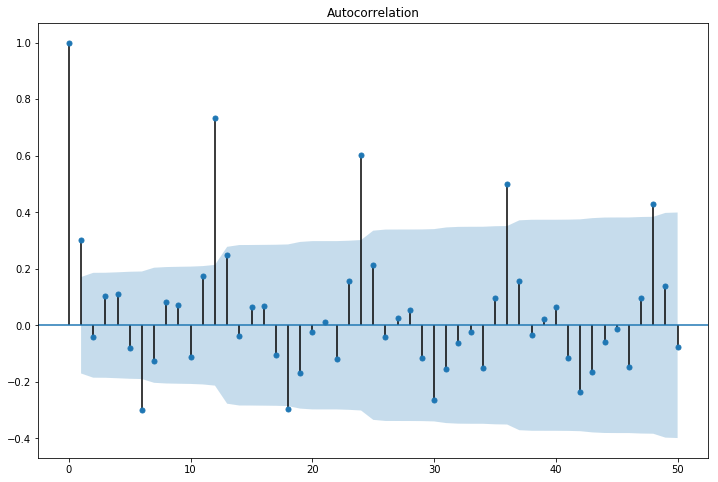

In [88]:
plt.figure(figsize=(12,8))
plot_acf(train,lags=50,  ax=plt.gca())
plt.show()

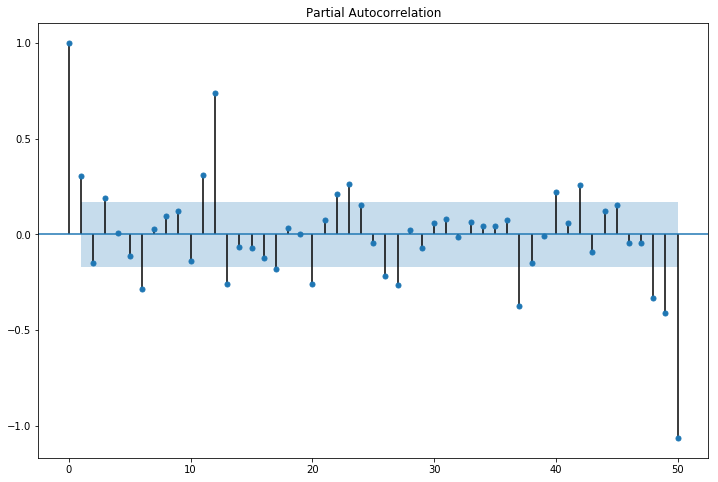

In [89]:
plt.figure(figsize=(12,8))
plot_pacf(train, lags=50, ax=plt.gca())
plt.show()

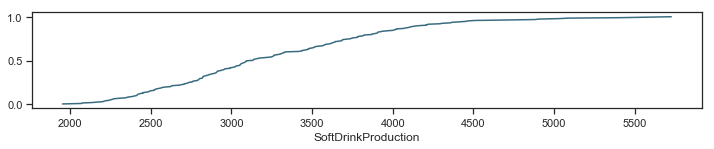

In [90]:
## Plot ECDF: Empirical Cumulative Distribution Function
#ECDF - Adds up the number of observations that are there for a certain value.
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

  
plt.subplot(312)
cdf = ECDF(df['SoftDrinkProduction'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('SoftDrinkProduction');